In [1]:
import numpy as np

# Домашнее задание на повторение numpy
В задании все пункты необходимо выполнить с помощью numpy, без использования циклов/map/и тд! 

Задание выполняется __самостоятельно__. Категорически запрещено пользоваться чужими решениями заданий (даже смотреть их), в том числе, размещенными в открытых источниках (если таковые обнаружатся). При обнаружении списывания выставляется 0 за задание (в случае списывания у одногруппника/однокурскника - __ему/ей тоже__), а также подается докладная записка в учебный офис. Проверка на списывание проводится и автоматическими средствами, и вручную.

### История

В конце каждого семестра каждый семинарист сталкивается с необходимостью выставить студентам накопленную в семестре оценку. Часто семинаристы делают это с помощью Excel или GoogleSheets, но поверьте, с этим возникают проблемы. В задании вам надо помочь семинаристу некоторого курса выполнить эту непростую работу с помощью numpy :)

Выполните ячейку ниже, чтобы загрузить данные и визуально проверить корректность их считывания.

По строкам - студенты, по столбцам - их оценки. В курсе семинарист провел три проверочных (первые три колонки), выдал три домашних работы (следующие три колонки), кроме того, у студентов есть оценка за коллоквиум (последняя колонка).

In [2]:
marks = np.loadtxt("https://raw.githubusercontent.com/nadiinchi/iad2019/master/materials/data_hw1.txt")

In [3]:
marks[:3]

array([[ 7. ,  8. , 10. ,  0. ,  0. ,  2.1,  1.5],
       [ 0. ,  6. ,  4.4,  4. ,  0. ,  5. ,  4.3],
       [ 3. ,  7. ,  8.7,  7.6,  7. ,  9.7, 10. ]])

### Число студентов (0.5 балла)
Сколько студентов в группе семинариста?

In [4]:
# Записать ответ в переменную num_studs
num_studs = marks.shape[0]

In [5]:
print(num_studs)

28


### Очень сложная проверочная, или просто добрый семинарист (1.25 балла)
Семинарист помнит, что первая проверочная получилась очень сложной, и максимальный балл в группе был далеко не 10. Поэтому он решил перенормировать баллы за эту проверочную на максимум по группе (поделить на максимум и умножить на 10) - чтобы у студента с максимальной оценкой получилось 10, а у остальных - просто оценка больше.

Каков максимальный балл за первую проверочную?

In [6]:
# Записать ответ в переменную max_mark
max_mark = np.max(marks[:,0])

In [7]:
print(max_mark)

7.0


Разделите первый столбец на max_mark (для этого надо выделить столбец, поставить после соответствующего выражения знак = и присвоить новое значение столбца)

In [8]:
norm_marks = marks[:,0] / max_mark * 10

In [9]:
marks[:,0] = norm_marks

Снова вычислите максимальный балл за первую проверочную (теперь он должен быть равен 10):

In [10]:
print(np.max(marks, axis=0)[0])

10.0


### Подсчет накопленной оценки (1.25 балла)
Для вычисления накопленной надо посчитать средние оценки за проверочные для каждого студента и средние за домашние работы (может пригодиться np.mean). Накопленная оценка есть 0.3\*Проверочные + 0.4\*Домашние + 0.3\*Коллоквиум. Вычислите накопленные оценки и добавьте их в последний столбец матрицы (нужно добавить еще один новый столбец).

In [11]:
# Веса следует брать из переменной weights, а не вписывать вручную
weights = [0.3, 0.4, 0.3]

In [12]:
marks_arr = np.array(marks)

In [13]:
# ср. проверочные
sw_mean = np.mean(marks_arr[:,:3], axis=1)

# ср. домашки
hw_mean = np.mean(marks_arr[:, 3:6], axis=1)

# накоп по виду - sw, hw, col
cumulative = np.transpose(np.vstack((sw_mean, hw_mean, marks_arr[:,6])))

# накоп, взвешенный на коэф.
cumulative_weighted = np.sum(cumulative * weights, axis=1).reshape(28,1)


In [14]:
# добавляем последний столбец с накопом
marks_arr = np.hstack((marks_arr, cumulative_weighted))

### Студенты, которых, вероятно, отчислят (1.25 балла)

Сколько в группе студентов с накопленной оценкой 0? Вам может понадобиться тот факт, что применение np.sum к бинарному вектору дает число значений True в нем, например:

In [15]:
np.sum([True, False, True]) # 2 значения True

2

Также обратим внимание на операцию поэлементного сравнения, возвращающую массив из True и False:

In [16]:
a = np.array([1, 2, 3])
b = np.array([2, 3, 3])
print(a == b)
print(a > b)

[False False  True]
[False False False]


In [17]:
is_zero = marks_arr[:,7] == 0.0

In [18]:
is_zero_count = np.sum(is_zero)

In [19]:
print(is_zero_count)

3


### Студенты, которые получат автоматы (1.25 балла)
Автомат получат студенты, у которых накопленная оценка больше 7. Добавьте еще один столбец - в нем стоит 1, если студент получает автомат, и 0 иначе.

In [20]:
is_not_zero = marks_arr[:,7] > 7

In [21]:
# переход из булеана в число и повышение размерности
is_not_zero = (is_not_zero * 1).reshape(28,1)

In [22]:
marks_arr = np.hstack((marks_arr, is_not_zero))

### Студенты, которые будут освобождены от задач на экзамене (1.25 балла)
Семинарист решил, что первая половина группы в рейтинге по накопленной оценке будет освобождена от решения задач на экзамене. Выделите этих студентов в отдельный массив. Для этого надо отсортировать строки массива (np.argsort) и взять первую половину.

In [23]:
marks_index = np.hstack((marks_arr, np.arange(28,)[:, np.newaxis]))
marks_sorted = marks_index[marks_index[:,7].argsort()]

In [24]:
# в порядке по убыванию берём 14 лучших
marks_best = marks_sorted[:13:-1]

In [25]:
# индексы 14 лучших
marks_best[:,9]

array([16., 22., 23.,  8., 11.,  5., 26.,  6., 27., 13., 14.,  9., 21.,
        2.])

### Сложность заданий (1.25 балла)
После выставления оценок семинаристу нужно решить, как усовершнествовать курс в будущем году. Семинарист хочет оценить сложность заданий, проверочных и коллоквиума по своей особой системе. Он присвоил каждому студенту вес (веса суммируются в 1) и хочет посчитать для каждого задания, проверочной и коллоквиума среднюю оценку с весами.
Пример, что имеется в виду: если есть 4 студента с весами [0.1, 0.2, 0.3, 0.4] и оценками [3, 7, 9, 10], то средняя оценка за задание с весами получится 

In [26]:
0.1 * 3 + 0.2 * 7 + 0.3 * 9 + 0.4 * 10 

8.4

Веса:

In [27]:
weights = np.array([1.]*7+[2.]*4+[3.]*7+[4.]*(marks.shape[0]-18))

# разделите веса на их сумму, чтобы они суммировались к 1
weights = weights / np.sum(weights)

# повторил строчку с весами 7 раз для дальнейших вычислений
weights = weights.reshape(28,1)

Посчитайте указанным образом сложность каждого "столбца".

In [28]:
marks_desc = marks_arr[marks_arr[:,7].argsort()]

In [29]:
weighted = marks_desc[:,:7] * weights

In [30]:
mean_weighted = np.sum(weighted, axis=0)
print(mean_weighted)

[6.38345865 8.10394737 8.86842105 7.375      6.375      7.94868421
 6.98815789]


### Визуализация данных (2=1.5+0.5 балла)
Наконец, семинарист решил визуализировать оценки. Постройте три точечных графика (scatter plot): на каждом по оси y будет накопленная оценка студента (вы рассчитали ее выше), а по оси x на одном графике средняя оценка за проверочные, на втором - за домашние работы, на третьем - за коллоквиум. Обязательно подпишите графики и оси!

In [31]:
from matplotlib import pyplot as plt
%matplotlib inline
# другие библиотеки использовать нельзя

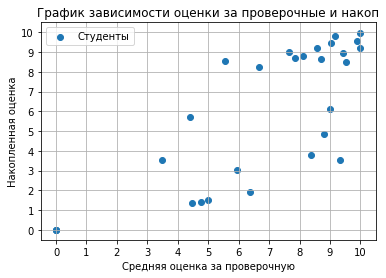

In [32]:
# sw + cumulative
y = marks_arr[:,7]
x = sw_mean

a = plt.subplot()

a.set(xlim=(-0.5, 10.5), xticks=np.arange(0, 11),
       ylim=(-0.5, 10.5), yticks=np.arange(0, 11))
a.grid(True)

a.scatter(x, y, label="Студенты")

plt.xlabel("Средняя оценка за проверочную")
plt.ylabel("Накопленная оценка")
plt.title("График зависимости оценки за проверочные и накоп")
plt.legend(loc=2)

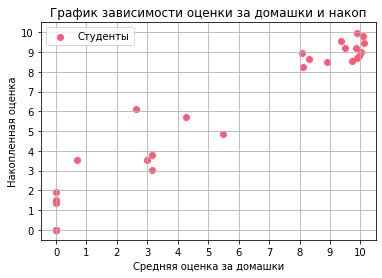

In [33]:
# hw + cumulative
y = marks_arr[:,7]
x = hw_mean

a = plt.subplot()

a.set(xlim=(-0.5, 10.5), xticks=np.arange(0, 11),
       ylim=(-0.5, 10.5), yticks=np.arange(0, 11))
a.grid(True)

a.scatter(x, y, color="#ff5c77", label="Студенты")

plt.xlabel("Средняя оценка за домашки")
plt.ylabel("Накопленная оценка")
plt.title("График зависимости оценки за домашки и накоп")
plt.legend(loc=2)

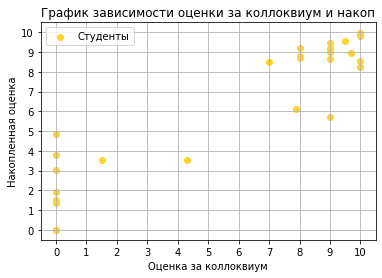

In [34]:
# col + cumulative
y = marks_arr[:,7]
x = marks_arr[:,6]

a = plt.subplot()

a.set(xlim=(-0.5, 10.5), xticks=np.arange(0, 11),
       ylim=(-0.5, 10.5), yticks=np.arange(0, 11))
a.grid(True)

a.scatter(x, y, color="#ffd429", label="Студенты")

plt.xlabel("Оценка за коллоквиум")
plt.ylabel("Накопленная оценка")
plt.title("График зависимости оценки за коллоквиум и накоп")
plt.legend(loc=2)

На отдельном графике визуализируйте отсортированные накопленные оценки: отсортруйте столбец с помощью функции np.sort, разверните слева направо (чтобы оценки оказались отсортированы по убыванию) и визуализируйте его с помощью функции plt.plot. Вновь не забудьте подписать оси!

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28]
[9.96       9.78857143 9.56666667 9.46761905 9.21809524 9.2
 9.01190476 8.96380952 8.81666667 8.71714286 8.63428571 8.56333333
 8.51714286 8.23857143 6.1247619  5.72238095 4.84       3.77952381
 3.53       3.53       3.04666667 1.90857143 1.5        1.43
 1.34       0.         0.         0.        ]


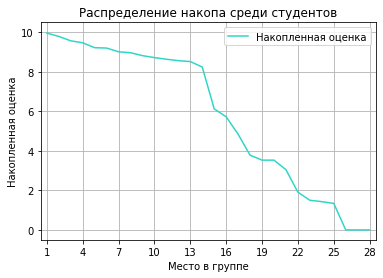

In [52]:
# col + cumulative
y = marks_sorted[:,7][::-1]
x = np.arange(1,29)

a = plt.subplot()

a.set(xlim=(0.5, 28.5), xticks=np.arange(1, 29, 3),
       ylim=(-0.5, 10.5), yticks=np.arange(0, 11, 2))
a.grid(True)

a.plot(x, y, color="#30d5c8", label="Накопленная оценка")

plt.xlabel("Место в группе")
plt.ylabel("Накопленная оценка")
plt.title("Распределение накопа среди студентов")
plt.legend(loc=1)

print(x)
print(y)